#### Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#### Part 1 - Initial Investigation

In [4]:
### importing data
column_names = ['StarRating', 'Title', 'ContentRating', 'Genre', 'Duration', 'ActorList']
raw = pd.read_csv('/content/imdb_1000.csv', names = column_names, skiprows = 1)
movies = pd.DataFrame(raw)
movies.head(3)

,StarRating,Title,ContentRating,Genre,Duration,ActorList
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [5]:
### check the number of rows and columns
rows = movies.shape[0]
columns = movies.shape[1]
print(f"The movies DataFrame consists of {columns} rows and {rows} rows.")

The movies DataFrame consists of 6 rows and 979 rows.


In [6]:
### check the data type of each column
movies.dtypes

StarRating       float64
Title             object
ContentRating     object
Genre             object
Duration           int64
ActorList         object
dtype: object

In [7]:
### Task 1 - calculate the average movie duration
avg_duration = round(movies['Duration'].mean(),2)
print(f"The average movie duration is {avg_duration} minutes")

The average movie duration is 120.98 minutes


In [9]:
### Task 2 - identify the shortest and longest movies
shortest = movies.sort_values('Duration').head(1)
longest = movies.sort_values('Duration').tail(1)

# concat two dataframes into one
dataframes = [shortest, longest]
comparison = pd.concat(dataframes).reset_index(drop = True)
comparison

,StarRating,Title,ContentRating,Genre,Duration,ActorList
0,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
1,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


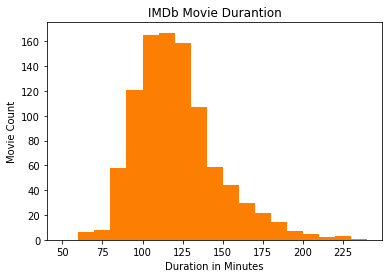

In [11]:
### Task 3 - create a histogram which visualizes movie duration

bins = np.arange(50, 250, 10).tolist()
plt.hist(movies['Duration'], bins = bins, color = '#fc7f03') # using hexadicimal number

# formatting 
plt.ylabel('Movie Count')
plt.xlabel('Duration in Minutes')
plt.title('IMDb Movie Durantion')
plt.show()

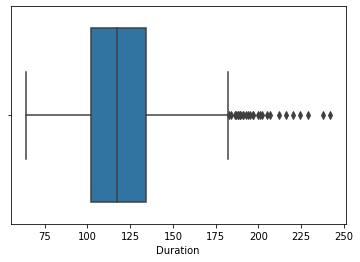

In [10]:
### Task 4 - use a box plot to visualize movie duration (seaborn)
sns.boxplot(x = movies['Duration'])
plt.show()

#### Part 2 - Further Filtering & Visualization

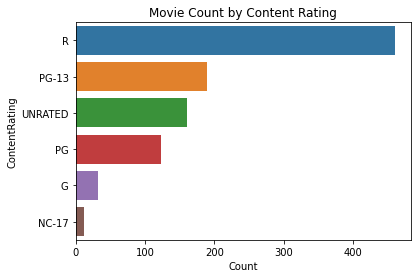

In [43]:
### Task 1 - count how many movies have each of the content ratings, visualize said counts
content_count = movies['ContentRating'].value_counts().reset_index()
content_count.rename(columns = {'index': 'ContentRating', 'ContentRating': 'Count'}, inplace = True)
sns.barplot(y = content_count['ContentRating'], x = content_count['Count']).set_title('Movie Count by Content Rating')
plt.show()

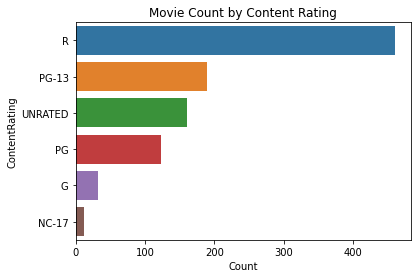

In [42]:
### Task 2 - convert the following content ratings

# "UNRATED": NOT RATED, APPROVED, PASSED, GP
movies['ContentRating'].replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace = True)

# "NC-17": X, TV-MA
movies['ContentRating'].replace(['X', 'TV-MA'], 'NC-17', inplace = True)

### Task 2A - visualization
content_count = movies['ContentRating'].value_counts().reset_index()
content_count.rename(columns = {'index': 'ContentRating', 'ContentRating': 'Count'}, inplace = True)
sns.barplot(y = content_count['ContentRating'], x = content_count['Count']).set_title('Movie Count by Content Rating')
plt.show()

In [44]:
### Task 3 - count the number of missing values in each column
movies.isnull().sum()

StarRating       0
Title            0
ContentRating    3
Genre            0
Duration         0
ActorList        0
dtype: int64

In [48]:
# Task 3A - find the movies that are missing a ContentRating
null_filter = movies['ContentRating'].isnull()
movies[null_filter]

,StarRating,Title,ContentRating,Genre,Duration,ActorList
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [49]:
# Task 3B - replacing NaN values, confirm 0 NaN values
movies['ContentRating'] = movies['ContentRating'].fillna('UNRATED')
movies.isnull().sum()

StarRating       0
Title            0
ContentRating    0
Genre            0
Duration         0
ActorList        0
dtype: int64

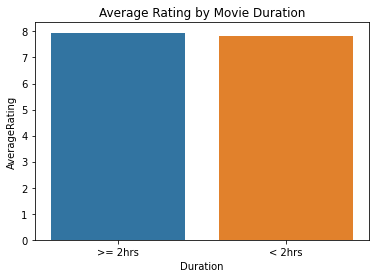

The average rating for movies >= 2 hrs is 7.95 while the average rating for movies < 2hrs = 7.84


In [71]:
### Task 4 - calculate the average rating for movies with durations >= 2hrs, compare with < 2hrs

# creating filters
long_filt = movies['Duration'] >= 120 
short_filt = movies['Duration'] < 120

# calculating average rating
long_rating = round(movies[long_filt]['StarRating'].mean(),2)
short_rating = round(movies[short_filt]['StarRating'].mean(),2)

# creating dictionaries --> dataframes
long_dict = {'Duration': '>= 2hrs', 'AverageRating': long_rating}
short_dict = {'Duration': '< 2hrs', 'AverageRating': short_rating}
long_df = pd.DataFrame(long_dict, index = [0])
short_df = pd.DataFrame(short_dict, index = [0])

# concat the above dataframes and visualize the comparison
dataframes = [long_df, short_df]
comparison = pd.concat(dataframes).reset_index(drop = True)
sns.barplot(x = comparison['Duration'], y = comparison['AverageRating']).set_title('Average Rating by Movie Duration')
plt.show()

print(f"The average rating for movies >= 2 hrs is {long_rating} while the average rating for movies < 2hrs = {short_rating}")

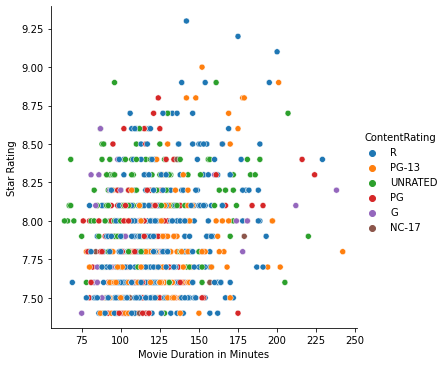

In [79]:
### Task 5 -  is a relationship between duration and star rating?
viz = sns.relplot(x = 'Duration', y = 'StarRating', hue = 'ContentRating', data = movies)
viz.set(xlabel = 'Movie Duration in Minutes', ylabel = 'Star Rating')
plt.show()

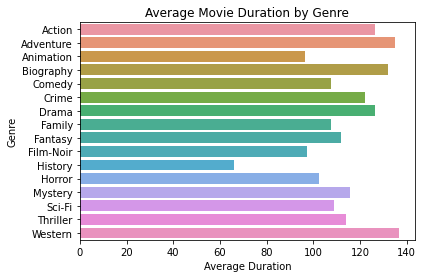

In [88]:
### Task 6 - calculate the average duration for each genre
duration = movies.groupby('Genre')['Duration'].mean().reset_index()
duration.rename(columns = {'Duration': 'Average Duration'}, inplace = True)
sns.barplot(y = duration['Genre'], x = duration['Average Duration']).set_title('Average Movie Duration by Genre')
plt.show()

#### Part 3 - Additional Filtering & Visualization

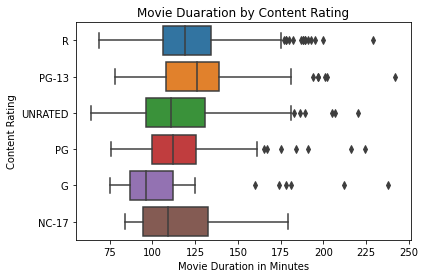

In [97]:
### Task  1 - visualize the relationship between content rating and duration
vis = sns.boxplot(x = movies['Duration'], y = movies['ContentRating'])
vis.set(xlabel = 'Movie Duration in Minutes', ylabel = 'Content Rating', title = 'Movie Duaration by Content Rating')
plt.show()

In [99]:
### Task 2 - determine the top rated movie for each genre

# creating a dataframe which includes all columns
top_movies = movies.sort_values('StarRating', ascending = False).groupby('Genre').first().reset_index()
top_movies

,Genre,StarRating,Title,ContentRating,Duration,ActorList
0,Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
1,Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
2,Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
3,Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
4,Comedy,8.6,Modern Times,G,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
5,Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
6,Drama,8.9,12 Angry Men,UNRATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
8,Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."
9,Film-Noir,8.3,The Third Man,UNRATED,93,"[u'Orson Welles', u'Joseph Cotten', u'Alida Va..."


In [110]:
### Task 3 - check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
# these dont seem like duplicates...maybe re-makes?
duplicated_titles = movies[movies['Title'].duplicated()]['Title']
duplicates = movies[movies['Title'].isin(duplicated_titles)]
duplicates.sort_values('Title').reset_index(drop = True)

,StarRating,Title,ContentRating,Genre,Duration,ActorList
0,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
1,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
2,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
3,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
4,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
5,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
6,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
7,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Bonus

In [133]:
### Part 1 - calculate the average star rating for each genre, only include genres with at least 10 movies
count = movies['Genre'].value_counts()
movie_list = count[count >= 10].index
movies[movies['Genre'].isin(movie_list)].groupby('Genre')['StarRating'].agg('mean')

Genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: StarRating, dtype: float64

In [139]:
### Part 1 - calculate the average rating for each genre, only include genres with at least 10 movies
# Method A - create a list of relevant genres by saving the value_counts and then filtering

# creating a series of genre counts
counts = movies['Genre'].value_counts()
# filtering the above series, setting genre as the index, essentially creating a list
top_genres = counts[counts >= 10].index
# filtering the movies dataframe by genres that exist in top_genres
filtered_movies = movies[movies['Genre'].isin(top_genres)].groupby('Genre')['StarRating'].mean().reset_index()
filtered_movies.sort_values('StarRating', inplace = True, ascending = False)
filtered_movies

,Genre,StarRating
8,Mystery,7.975000
1,Adventure,7.933333
5,Crime,7.916935
2,Animation,7.914516
6,Drama,7.902518
0,Action,7.884559
3,Biography,7.862338
4,Comedy,7.822436
7,Horror,7.806897


In [145]:
# Method B - calculate the average star rating for all genres, filter using a boolean Series
method_b = movies.groupby('Genre')['StarRating'].mean()[movies['Genre'].value_counts() >= 10].reset_index()
method_b = method_b.sort_values('StarRating', ascending = False)
method_b

,Genre,StarRating
8,Mystery,7.975000
1,Adventure,7.933333
5,Crime,7.916935
2,Animation,7.914516
6,Drama,7.902518
0,Action,7.884559
3,Biography,7.862338
4,Comedy,7.822436
7,Horror,7.806897


In [156]:
# Method C - aggregate by count and mean, then filter using the count
method_c = movies.groupby('Genre')['StarRating'].agg(['mean', 'count']).rename(columns = {'mean': 'StarRating'}).reset_index()
method_c[method_c['count'] >= 10][['Genre', 'StarRating']].sort_values('StarRating', ascending = False)

,Genre,StarRating
12,Mystery,7.975000
1,Adventure,7.933333
5,Crime,7.916935
2,Animation,7.914516
6,Drama,7.902518
0,Action,7.884559
3,Biography,7.862338
4,Comedy,7.822436
11,Horror,7.806897


In [191]:
### Part 2 - Figure out something "interesting" using the actors data
pd.set_option('display.max_colwidth', 100)

# Step 2 - creating a function that will be used to clean the ActorList column
def string_cleaner(row):
  row = row.replace("u'","")
  char = "'\""
  row = row[1:-1]
  for c in char:
    row = row.replace(c,"")
  return row

movies['ActorList'].apply(lambda x: string_cleaner(x).split(","))

0                  [Tim Robbins,  Morgan Freeman,  Bob Gunton]
1                     [Marlon Brando,  Al Pacino,  James Caan]
2                 [Al Pacino,  Robert De Niro,  Robert Duvall]
3              [Christian Bale,  Heath Ledger,  Aaron Eckhart]
4            [John Travolta,  Uma Thurman,  Samuel L. Jackson]
                                ...                           
974               [Dustin Hoffman,  Jessica Lange,  Teri Garr]
975    [Michael J. Fox,  Christopher Lloyd,  Mary Steenburgen]
976                [Russell Crowe,  Paul Bettany,  Billy Boyd]
977     [JoBeth Williams,  uHeather ORourke,  Craig T. Nelson]
978           [Charlie Sheen,  Michael Douglas,  Tamara Tunie]
Name: ActorList, Length: 979, dtype: object

In [192]:
# Step 1 - finding max number of actors
movies['ActorCount'] = movies['ActorList'].apply(lambda x: x.count(",") + 1)
movies['ActorCount'].value_counts()

3    979
Name: ActorCount, dtype: int64

In [211]:
# Step 2 - creating a function that will be used to clean the ActorList column
def string_cleaner(row):
  row = row.replace("u\"","")
  row = row.replace("u'","")
  row = row[1:-1]
  char = "'\""
  for c in char:
    row = row.replace(c,"")
  return row.split(",")

In [212]:
# Step 3 - applying the above function to create individual actor columns
movies['Actor1'] = movies['ActorList'].apply(lambda x: string_cleaner(x)[0])
movies['Actor2'] = movies['ActorList'].apply(lambda x: string_cleaner(x)[1])
movies['Actor3'] = movies['ActorList'].apply(lambda x: string_cleaner(x)[2])

In [214]:
movies.groupby('Actor1')['StarRating'].mean()


Actor1
Aamir Khan              8.375
Aaron Eckhart           7.600
Aaron Taylor-Johnson    7.700
Adam Sandler            7.500
Adriana Caselotti       7.700
                        ...  
Zach Galifianakis       7.800
Zbigniew Zamachowski    7.700
Zero Mostel             7.700
Ziyi Zhang              7.600
Zooey Deschanel         7.800
Name: StarRating, Length: 581, dtype: float64